# Laboratory 6

## Dmytro Romaniv
### Student ID: 151958

In [1]:
#https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math
from math import pi, cos, sin
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

theta = 0.7
m = 10  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
#display(qc.draw('mpl'))

In [2]:
from qiskit.primitives import Sampler

display(Sampler().run(qc).result().quasi_dists[0])

{0: 5.03410382e-07, 1: 5.01178366e-07, 2: 4.98970533e-07, 3: 4.96786589e-07, 4: 4.94626242e-07, 5: 4.92489208e-07, 6: 4.90375204e-07, 7: 4.88283955e-07, 8: 4.86215189e-07, 9: 4.84168637e-07, 10: 4.82144036e-07, 11: 4.80141128e-07, 12: 4.78159657e-07, 13: 4.76199372e-07, 14: 4.74260027e-07, 15: 4.72341378e-07, 16: 4.70443187e-07, 17: 4.68565218e-07, 18: 4.66707241e-07, 19: 4.64869025e-07, 20: 4.63050349e-07, 21: 4.6125099e-07, 22: 4.59470731e-07, 23: 4.57709359e-07, 24: 4.55966663e-07, 25: 4.54242436e-07, 26: 4.52536472e-07, 27: 4.50848573e-07, 28: 4.49178539e-07, 29: 4.47526176e-07, 30: 4.45891293e-07, 31: 4.442737e-07, 32: 4.42673211e-07, 33: 4.41089644e-07, 34: 4.39522818e-07, 35: 4.37972556e-07, 36: 4.36438683e-07, 37: 4.34921027e-07, 38: 4.33419417e-07, 39: 4.31933688e-07, 40: 4.30463675e-07, 41: 4.29009216e-07, 42: 4.27570151e-07, 43: 4.26146324e-07, 44: 4.24737578e-07, 45: 4.23343764e-07, 46: 4.21964728e-07, 47: 4.20600326e-07, 48: 4.19250409e-07, 49: 4.17914836e-07, 50: 4.165934

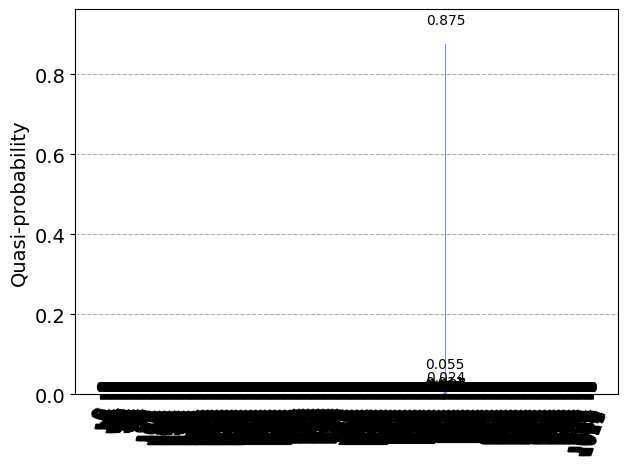

In [3]:
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

In [4]:
most_probable = max(result.quasi_dists[0], key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 717
Estimated theta: 0.7001953125


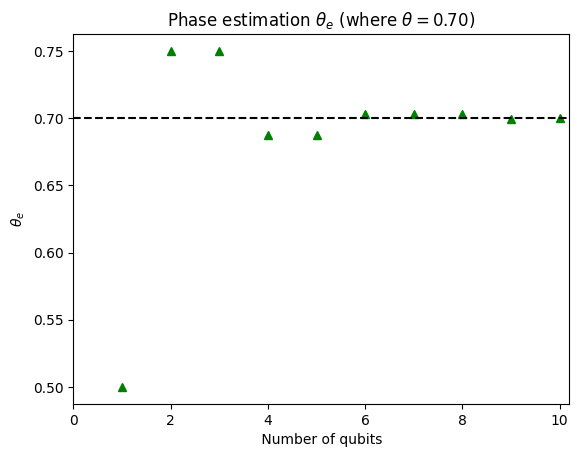

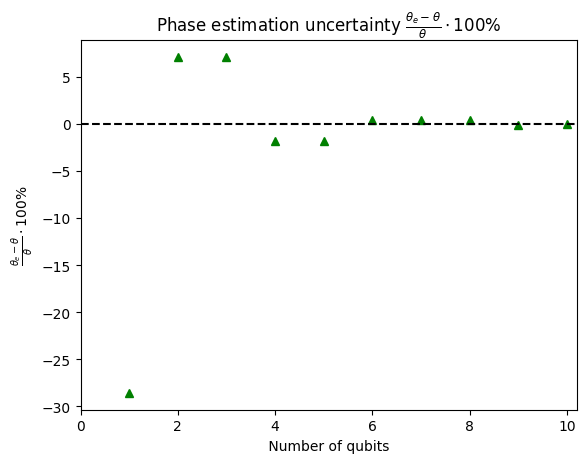

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
DaneY1=[0.5,0.75,0.75,0.6875,0.6875,0.703125,0.703125,0.703125,0.69921875,0.7001953125]
DaneX=[1,2,3,4,5,6,7,8,9,10]
DaneY2=[]
for i in range(len(DaneY1)):
    DaneYX=((DaneY1[i]-theta)/theta) *100
    DaneY2.append(DaneYX)
plt.title(u'Phase estimation $\\theta_e$ (where $\\theta=0.70$)')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\theta_e$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY1, 'g^')
plt.hlines(y=0.70,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_1_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()


plt.title(r'Phase estimation uncertainty $\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY2, 'g^')
plt.hlines(y=0.0,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_2_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()